In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/train2.csv")
val = pd.read_csv("/content/val2.csv")
test = pd.read_csv("/content/test2.csv")

In [ ]:
#df = df[df["title_bout"]==0]
#df = df.drop("title_bout", axis=1)

#df = df[df["title_bout"]==0]
#df = df.drop("title_bout", axis=1)

#df = df[df["location"]==66]
#df = df.drop("location", axis=1)

#df = df[df["title_bout"]==0]
#df = df.drop("title_bout", axis=1)

#df = df[df["B_Stance"]==1.0]
#df = df.drop("B_Stance", axis=1)

#df = df[df["country"]==21.0]
#df = df.drop("country", axis=1)

#df = df[df["R_Stance"]==1.0]
#df = df.drop("R_Stance", axis=1)

#df = df[df["empty_arena"]==0.0]
#df = df.drop("empty_arena", axis=1)

#df = df[df["better_rank"]==0]
#df = df.drop("better_rank", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

y = df['R_odds'].values
X = df.drop(['R_odds', 'B_odds', 'Winner'], axis=1) # Cheating prevent, odds and winner feature 제외
#X = df.drop(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'odds_dif'], axis=1)


KeyError: ignored

# regression

In [ ]:
X_train = train.drop(['R_odds', 'B_odds'], axis=1)
y_train = train['R_odds'].values

X_val = val.drop(['R_odds', 'B_odds'], axis=1)
y_val = val['R_odds'].values

X_test = test.drop(['R_odds', 'B_odds'], axis=1)
y_test = test['R_odds'].values


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train.values)
X_val = X_scaler.transform(X_val.values)
X_test = X_scaler.transform(X_test.values)

y_train = y_scaler.fit_transform(y_train.reshape(y_train.shape[0], 1)).reshape(y_train.shape[0])
y_val = y_scaler.transform(y_val.reshape(y_val.shape[0], 1)).reshape(y_val.shape[0])
y_test = y_scaler.transform(y_test.reshape(y_test.shape[0], 1)).reshape(y_test.shape[0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = RandomForestRegressor(n_estimators=60)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=60)

In [ ]:
# validation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import pearsonr

y_pred_val= model.predict(X_val)

r2 = r2_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
mape = mean_absolute_percentage_error(y_val, y_pred_val)
r, p = pearsonr(y_val, y_pred_val)

print("** R2 score:", r2)
print("** MSE:", mse)
print("** MAE:", mae)
print("** MAPE:", mape)
print("** Pearson Correlation || coef={}, p-value={}".format(r, p))

** R2 score: 0.2986311098419969
** MSE: 0.687203730545264
** MAE: 0.6528680972350701
** MAPE: 3.3897059526812305
** Pearson Correlation || coef=0.5536564991642733, p-value=7.939371548233234e-34


In [ ]:
# test
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy.stats import pearsonr

y_pred_test= model.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)
r, p = pearsonr(y_test, y_pred_test)

print("** R2 score:", r2)
print("** MSE:", mse)
print("** MAE:", mae)
print("** MAPE:", mape)
print("** Pearson Correlation || coef={}, p-value={}".format(r, p))

** R2 score: 0.2792350519882655
** MSE: 46934.423215265524
** MAE: 170.17310405643738
** MAPE: 0.8205355295674728
** Pearson Correlation || coef=0.5418435187881097, p-value=1.4054611150053756e-44


Text(0, 0.5, 'Prediction')

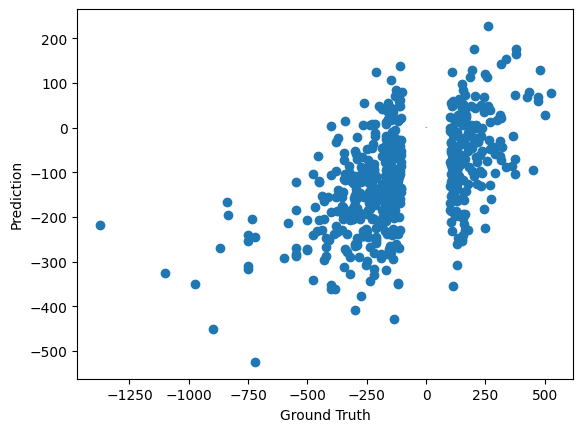

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test)
plt.plot(np.arange(0, 2), np.arange(0, 2), color='black', linestyle='--', alpha=0.7)
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train R-squared score: {train_score}")
print(f"Test R-squared score: {test_score}")

Train R-squared score: 0.8906594469717954
Test R-squared score: 0.2792350519882655


In [ ]:
fi = model.feature_importances_

forest_importances = pd.Series(fi, index=X.columns)


fig, ax = plt.subplots(figsize=(16, 4))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: ignored

# logistic regression

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
#df = df[df["location"]==66]
#df = df.drop("title_bout", axis=1)

#df = df[df["title_bout"]==0]
#df = df.drop("title_bout", axis=1)

#df = df[df["B_Stance"]==1.0]
#df = df.drop("B_Stance", axis=1)

#df = df[df["country"]==21.0]
#df = df.drop("country", axis=1)

#df = df[df["R_Stance"]==1.0]
#df = df.drop("R_Stance", axis=1)

#df = df[df["empty_arena"]==0.0]
#df = df.drop("empty_arena", axis=1)

#df = df[df["better_rank"]==0]
#df = df.drop("better_rank", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

y = df['Winner'].values

X = df.drop(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'Winner'], axis=1) # Cheating 방지, 배당금 관련, 승패여부 feature 제외


In [ ]:
X_train = train.drop(['R_odds', 'B_odds', 'Winner'], axis=1) # Cheating 방지, 배당금 관련, 승패여부 feature 제외
y_train = train['Winner'].values

X_test = test.drop(['R_odds', 'B_odds', 'Winner'], axis=1) # Cheating 방지, 배당금 관련, 승패여부 feature 제외
y_test = test['Winner'].values

In [ ]:
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train.values)
X_test = X_scaler.transform(X_test.values)

#y_train = y_scaler.fit_transform(y_train.reshape(y_train.shape[0], 1)).reshape(y_train.shape[0])
#y_test = y_scaler.transform(y_test.reshape(y_test.shape[0], 1)).reshape(y_test.shape[0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logreg_classifier = LogisticRegression(random_state=0)
logreg_classifier.fit(X_train, y_train)

y_prob = logreg_classifier.predict_proba(X_test)
y_pred = logreg_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.43      0.51       325
           1       0.68      0.82      0.74       485

    accuracy                           0.66       810
   macro avg       0.65      0.62      0.62       810
weighted avg       0.65      0.66      0.65       810



In [ ]:
test = val.drop(['R_odds', 'B_odds', 'Winner'], axis=1) # Cheating 방지, 배당금 관련, 승패여부 feature 제외

y_prob_new = logreg_classifier.predict_proba(test)
y_pred_new = logreg_classifier.predict(test)

print('Predicted probability:\n', y_prob_new)
print('\nPreducted value:\n', y_pred_new)

KeyError: ignored

In [ ]:
y_prob_test = y_prob_new
y_pred_test = y_pred_new
sample = val

# regression with testset

In [ ]:
sample

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,...,R_TD_Def,R_Sub_Avg,SLpM_y,B_Str_Acc,B_SApM,B_Str_Def,B_TD_Avg,B_TD_Acc,B_TD_Def,B_Sub_Avg
0,684,170,210,-230,5709,30,3,0,0,10,...,0.33,1.1,3.12,0.66,2.77,0.46,0.45,0.28,0.87,0.0
1,798,239,125,-135,7275,77,12,0,0,8,...,0.66,0.0,4.14,0.48,3.94,0.56,1.70,0.51,0.66,0.5
2,401,1419,-130,120,6112,59,21,0,0,8,...,0.66,0.8,1.28,0.42,1.56,0.48,2.36,0.63,0.37,2.8
3,260,1499,-125,100,8688,66,26,1,0,10,...,0.60,1.2,3.55,0.45,3.45,0.47,1.72,0.41,0.60,1.7
4,359,1043,-275,235,8361,62,18,0,0,7,...,0.77,0.1,3.73,0.44,2.93,0.54,0.75,0.46,0.55,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,1381,213,-420,335,6745,66,21,1,1,9,...,0.65,0.9,1.59,0.46,2.83,0.50,1.02,0.60,0.53,0.6
827,908,429,-640,470,7801,25,21,1,1,7,...,0.84,0.8,4.06,0.40,4.44,0.61,0.64,0.18,0.74,0.2
828,1042,276,-355,320,5793,108,2,1,0,10,...,0.72,0.6,1.72,0.40,3.06,0.50,0.00,0.00,0.22,0.0
829,30,602,-115,105,6184,51,2,0,0,4,...,0.33,2.3,2.94,0.44,2.17,0.56,3.01,0.36,0.52,0.1


In [ ]:
y_prob_test = pd.DataFrame(y_prob_test, columns=['x_prob', 'y_prob'])
y_column_names = y_prob_test.columns.tolist()
y_column_names

['x_prob', 'y_prob']

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['y_pred'])
y_pred_column_names = y_pred_test.columns.tolist()
y_pred_column_names

['y_pred']

In [ ]:
X_column_names = sample.columns.tolist()
X_column_names

['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds',
 'date',
 'location',
 'country',
 'Winner',
 'title_bout',
 'weight_class',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_Stance',
 'R_Height_cms',
 'R_Reach_cms',
 'R_Weight_lbs',
 'R_age',
 'B_age',
 'empty_arena',
 'better_rank',
 'R_current',
 'B_current',
 'Height_dif',
 'Weight_dif',
 'Reach_dif',
 'odds_dif',
 'SLpM_x',
 'R_Str_Acc',
 'R_SApM',
 'R_Str_Def',
 'R_TD_Avg',
 'R_TD_Acc',
 'R_TD_Def',
 'R_Sub_Avg',
 'SLpM_y',
 'B_Str_Acc',
 'B_SApM',
 'B_Str_Def',
 'B_TD_Avg',
 'B_TD_Acc',
 'B_TD_Def',
 'B_Sub_Avg']

In [ ]:
import numpy as np
import pandas as pd

df_combined = pd.concat([sample, y_prob_test, y_pred_test], axis=1)
df_combined

,R_fighter,B_fighter,R_odds,B_odds,date,location,country,Winner,title_bout,weight_class,...,B_Str_Acc,B_SApM,B_Str_Def,B_TD_Avg,B_TD_Acc,B_TD_Def,B_Sub_Avg,x_prob,y_prob,y_pred
0,684,170,210,-230,5709,30,3,0,0,10,...,0.66,2.77,0.46,0.45,0.28,0.87,0.0,0.535415,0.464585,0
1,798,239,125,-135,7275,77,12,0,0,8,...,0.48,3.94,0.56,1.70,0.51,0.66,0.5,0.470264,0.529736,1
2,401,1419,-130,120,6112,59,21,0,0,8,...,0.42,1.56,0.48,2.36,0.63,0.37,2.8,0.429163,0.570837,1
3,260,1499,-125,100,8688,66,26,1,0,10,...,0.45,3.45,0.47,1.72,0.41,0.60,1.7,0.446884,0.553116,1
4,359,1043,-275,235,8361,62,18,0,0,7,...,0.44,2.93,0.54,0.75,0.46,0.55,0.6,0.470161,0.529839,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,1381,213,-420,335,6745,66,21,1,1,9,...,0.46,2.83,0.50,1.02,0.60,0.53,0.6,0.207918,0.792082,1
827,908,429,-640,470,7801,25,21,1,1,7,...,0.40,4.44,0.61,0.64,0.18,0.74,0.2,0.265040,0.734960,1
828,1042,276,-355,320,5793,108,2,1,0,10,...,0.40,3.06,0.50,0.00,0.00,0.22,0.0,0.431131,0.568869,1
829,30,602,-115,105,6184,51,2,0,0,4,...,0.44,2.17,0.56,3.01,0.36,0.52,0.1,0.529636,0.470364,0


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     831 non-null    int64  
 1   B_fighter     831 non-null    int64  
 2   R_odds        831 non-null    int64  
 3   B_odds        831 non-null    int64  
 4   date          831 non-null    int64  
 5   location      831 non-null    int64  
 6   country       831 non-null    int64  
 7   Winner        831 non-null    int64  
 8   title_bout    831 non-null    int64  
 9   weight_class  831 non-null    int64  
 10  B_Stance      831 non-null    int64  
 11  B_Height_cms  831 non-null    float64
 12  B_Reach_cms   831 non-null    float64
 13  B_Weight_lbs  831 non-null    int64  
 14  R_Stance      831 non-null    int64  
 15  R_Height_cms  831 non-null    float64
 16  R_Reach_cms   831 non-null    float64
 17  R_Weight_lbs  831 non-null    int64  
 18  R_age         831 non-null    

In [ ]:
# regression with this data
df_combined.to_csv("/content/sample.csv")